### Titanic Dataset solution by Utkarsh Tripathi 13 oct 2021

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [232]:
train= pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [233]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [234]:
gen_sub = pd.read_csv('gender_submission.csv')
gen_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [235]:
train.shape

(891, 12)

In [236]:
test.shape

(418, 11)

<AxesSubplot:>

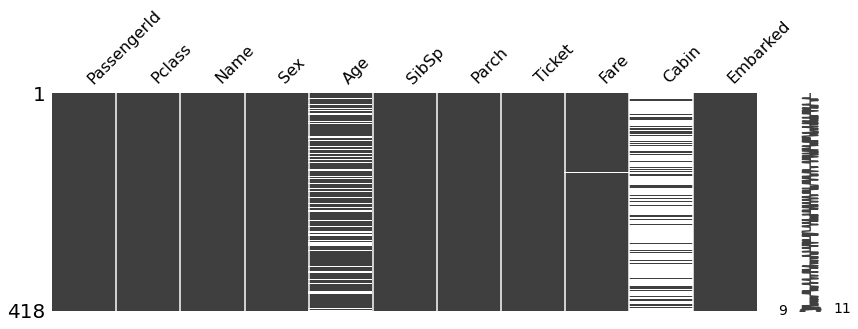

In [237]:
import missingno
missingno.matrix(test, figsize = (14, 4))

<AxesSubplot:>

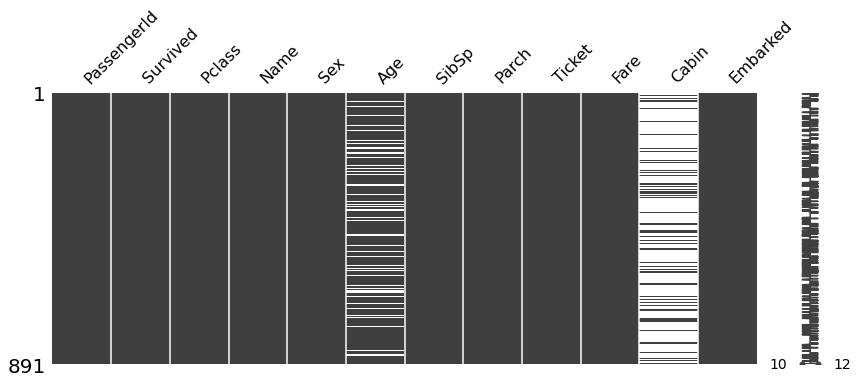

In [238]:
missingno.matrix(train, figsize=(14, 5))

In [239]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [240]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


## Drop
Name, Ticket, Cabin, Embarked

#### हम यहाँ पे train और  test  दोनों Data मे से  Name, Ticket, Cabin, Embarked को Drop करेंगे । 

In [241]:
d_train = train.drop(columns = ['Name', 'Ticket', 'Cabin', 'Embarked', 'Age', 'Fare'], axis= 1)
d_train.head(3)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch
0,1,0,3,male,1,0
1,2,1,1,female,1,0
2,3,1,3,female,0,0


In [242]:
d_test = test.drop(columns = ['Name', 'Ticket', 'Cabin', 'Embarked', 'Age', 'Fare'], axis= 1)
d_test.head(3)

,PassengerId,Pclass,Sex,SibSp,Parch
0,892,3,male,0,0
1,893,3,female,1,0
2,894,2,male,0,0


### Droping Na Values from both train and Test Data 

In [243]:
d_train =  d_train.dropna()

In [244]:
d_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
dtype: int64

In [245]:
d_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
dtype: int64

In [246]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Sex          891 non-null    object
 4   SibSp        891 non-null    int64 
 5   Parch        891 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 48.7+ KB


### Changing Sex into numerical Value

In [247]:
d_train.replace({'Sex':{'male': '1', 'female': '0'}}, inplace = True)

d_test.replace({'Sex':{'male': '1', 'female': '0'}}, inplace = True)

### Changing Age & Fare into Integer data type 

In [250]:

d_train['Sex'] = d_train['Sex'].astype(int)




In [251]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int32
 4   SibSp        891 non-null    int64
 5   Parch        891 non-null    int64
dtypes: int32(1), int64(5)
memory usage: 45.2 KB


In [252]:
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Sex          418 non-null    object
 3   SibSp        418 non-null    int64 
 4   Parch        418 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.5+ KB


In [253]:
d_train['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [254]:
d_test['Sex']

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: object

<AxesSubplot:>

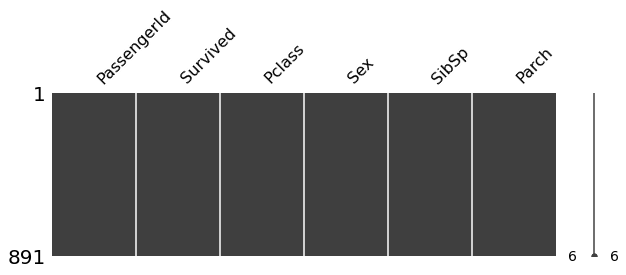

In [255]:
missingno.matrix(d_train, figsize = (10,3))

In [256]:
d_train.head(3)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch
0,1,0,3,1,1,0
1,2,1,1,0,1,0
2,3,1,3,0,0,0


In [257]:
d_test.head(3)

,PassengerId,Pclass,Sex,SibSp,Parch
0,892,3,1,0,0
1,893,3,0,1,0
2,894,2,1,0,0


In [258]:
x_train = d_train[['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch']]
y_train = d_train[['Survived']]

In [259]:
x_test = d_test
x_test

,PassengerId,Pclass,Sex,SibSp,Parch
0,892,3,1,0,0
1,893,3,0,1,0
2,894,2,1,0,0
3,895,3,1,0,0
4,896,3,0,1,1
...,...,...,...,...,...
413,1305,3,1,0,0
414,1306,1,0,0,0
415,1307,3,1,0,0
416,1308,3,1,0,0


In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier


from sklearn import tree


In [261]:
LR_model = LogisticRegression()

svm_model = SVC()

nb_model = GaussianNB()

knn_model = KNeighborsClassifier(n_neighbors=3)

dtc_model = tree.DecisionTreeClassifier()

### Logistic Regression

In [262]:
LR_model.fit(x_train, y_train)

LR_model.score(x_train, y_train)

E:\anaconda_installed\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8002244668911336

### Support Vector Machine

In [263]:
svm_model.fit(x_train, y_train)

svm_model.score(x_train, y_train)

E:\anaconda_installed\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6161616161616161

In [264]:
nb_model.fit(x_train, y_train)

nb_model.score(x_train, y_train)

E:\anaconda_installed\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7699214365881033

### Nearest Neighbour

In [265]:
knn_model.fit(x_train, y_train)

knn_model.score(x_train, y_train)

E:\anaconda_installed\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8024691358024691

# Decision Tree Classifier

In [266]:
dtc_model.fit(x_train, y_train)



DecisionTreeClassifier()

In [267]:
dtc_model.score(x_train, y_train)

1.0

In [268]:
dtc_model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [269]:
submission_preds = dtc_model.predict(x_test)

In [270]:
test_id = x_test['PassengerId']

In [271]:
df = pd.DataFrame({"PassengerId":test_id.values,
                  "Survived":submission_preds
                  })

In [272]:
df.to_csv('Tripathi_ji_Final_Sub.csv', index=False)